### Outliers

**When outliers are dangerous:**  
- **Affect statistical measures:** Mean, standard deviation, correlation, regression coefficients can be distorted.  
- **Mislead ML models:** Linear regression, KNN, SVM, and distance-based algorithms are sensitive to extreme values.  
- **Indicate data errors:** Typos, measurement mistakes, or incorrect entries can give wrong insights.  
- **Cause bias in training:** Small datasets with outliers can skew model learning.

**When outliers are not dangerous (or useful):**  
- **Genuine rare events:** Fraud detection, disease outbreaks, or rare customer behavior.  
- **Robust models:** Tree-based models (Random Forest, XGBoost) are less sensitive to outliers.  
- **Large datasets:** Small number of outliers usually do not affect overall patterns.  
- **Important signal:** Outliers can reveal interesting patterns, trends, or anomalies.

**Key Point:**  
> Outliers are dangerous if they are errors or heavily affect models/statistics, but they can be useful if they represent real, meaningful variations in the data.


# Z-Score Method

**What it is:**  
The Z-score method identifies outliers based on **how many standard deviations a value is from the mean**.  
- Formula:  
  Z = (X - μ) / σ  
  where μ = mean, σ = standard deviation  

**Key Assumption:**  
- Data is **approximately normally distributed** (bell-shaped)  
- In normal distribution, ~99.7% of data lies within ±3σ  

---

**When the data are not normally distributed:**  
- Z-score may **misclassify many points as outliers**  
- Skewed or heavy-tailed distributions give misleading Z-scores  
- In such cases, **other methods** are preferred (e.g., IQR, percentile, or robust Z-score)

---

**Solutions for detected outliers:**  
- **Trimming / Removing:** Drop extreme values (use with caution if dataset is small)  
- **Capping / Winsorizing:** Replace extreme values with nearest acceptable value (e.g., 1st or 99th percentile)

---

**Key Point:**  
> Z-score works best for **normal distributions**; for skewed or non-normal data, consider **IQR or robust methods** to detect and handle outliers.


![img](z_score.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pc=pd.read_csv("data/placement.csv")
pc.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: ylabel='Density'>

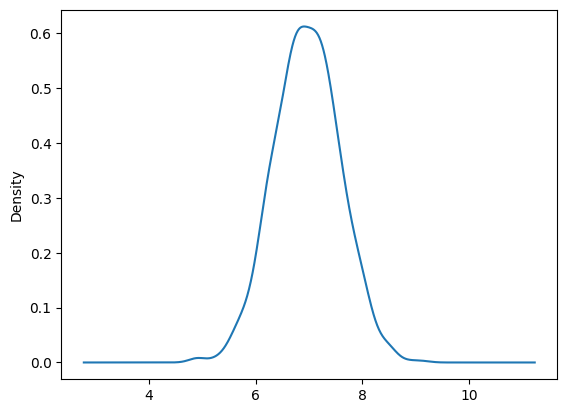

In [ ]:
pc["cgpa"].plot(kind="kde")

In [ ]:
pc.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [ ]:
# Finding Boundary values
print("Highest allow", pc["cgpa"].mean()+3*pc["cgpa"].std())
print("Lowest allowed" ,pc["cgpa"].mean()-3*pc["cgpa"].std())

Highest allow 8.808933625397168
Lowest allowed 5.113546374602832


In [ ]:

# outlier
pc[(pc["cgpa"]>8.80) | (pc["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
# trimming
new_pc=pc[(pc["cgpa"]<8.80) & (pc["cgpa"]>5.11)]
new_pc

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [ ]:
# capping
upper_limit=pc["cgpa"].mean()+3*pc["cgpa"].std()
lower_limit=pc["cgpa"].mean()-3*pc["cgpa"].std()

In [ ]:
pc["cgpa"]=np.where(
    pc["cgpa"]>upper_limit,
    upper_limit,
    np.where(
        pc["cgpa"]<lower_limit,
        lower_limit,
        pc["cgpa"]
    )
)

In [ ]:
pc.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


## IQR (Interquartile Range) Method

**What it is:**  
IQR is a **robust method to detect outliers**, especially useful for **skewed data**.  
- Unlike Z-score, it does **not assume normality**.  

---

**Boxplot:**  
- A visual representation of the distribution of a dataset.  
- Shows **minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum**.  
- Outliers often shown as **dots beyond the whiskers**.

---

**IQR Definition:**  
- IQR = Q3 − Q1  
- **Whiskers** usually extend to:  
  - Lower bound = Q1 − 1.5 × IQR  
  - Upper bound = Q3 + 1.5 × IQR  
- Any data outside this range is considered a potential outlier.

---

**Why it’s good for skewed data:**  
- Median and IQR are **robust to skew and extreme values**.  
- Unlike mean and standard deviation, they are not heavily influenced by outliers.

---

**Usage Example (pandas):**  
```python
import pandas as pd

data = pd.Series([10, 12, 15, 18, 100])
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]
print(outliers)


![img](boxplot.png)

<Axes: ylabel='Density'>

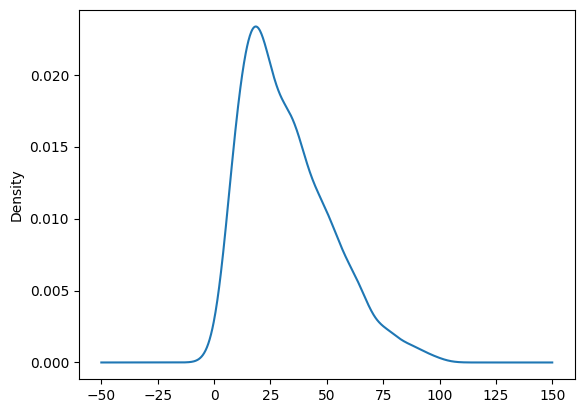

In [ ]:
pc=pd.read_csv("data/placement.csv")
pc["placement_exam_marks"].plot(kind="kde")

<Axes: >

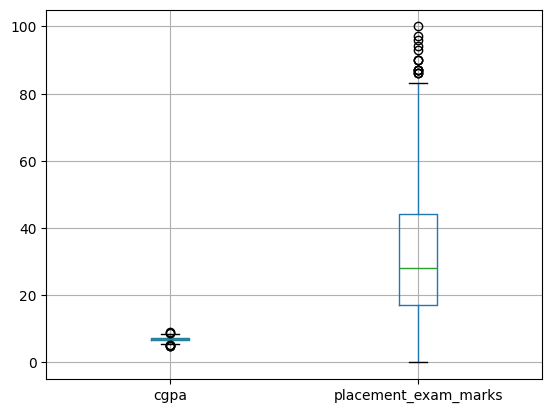

In [ ]:
pc[["cgpa", "placement_exam_marks"]].boxplot()

In [ ]:
Q_1=pc["placement_exam_marks"].quantile(0.25)
Q_3=pc["placement_exam_marks"].quantile(0.75)
IQR=Q_3-Q_1

In [ ]:
max=Q_3+1.5*IQR
min=Q_1-1.5*IQR


In [ ]:
print(f"Q_1:{Q_1}, IQR:{IQR}, Q_3:{Q_3}, min:{min}, max:{max}")

Q_1:17.0, IQR:27.0, Q_3:44.0, min:-23.5, max:84.5


In [ ]:
pc[pc["placement_exam_marks"]>max]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [ ]:
# Trimming
new_pc=pc[pc["placement_exam_marks"]<max]

<Axes: >

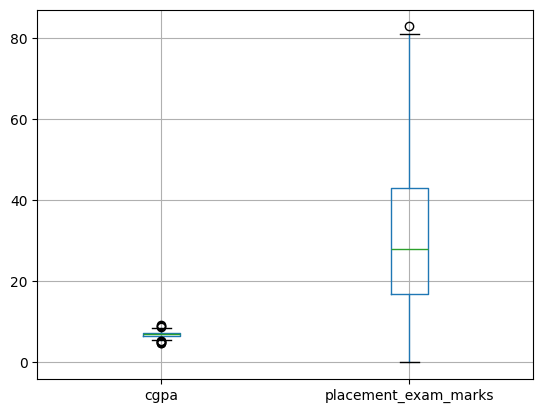

In [ ]:
new_pc[["cgpa", "placement_exam_marks"]].boxplot()

In [ ]:
# Capping
pc["placement_exam_marks"]=np.where(
    pc["placement_exam_marks"]>max,
    max,
    np.where(
        pc["placement_exam_marks"]<min,
        min,
        pc["placement_exam_marks"]
    )
)

<Axes: >

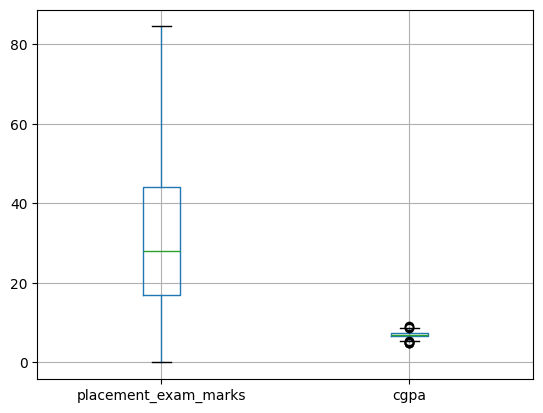

In [ ]:
pc[["placement_exam_marks", "cgpa"]].boxplot()